In [1]:
"""
this code recreates Complexity-calibrated Benchmarks for Machine Learning
Reveal When Next-Generation Reservoir Computer Predictions
Succeed and Mislead
"""


'\nthis code recreates Complexity-calibrated Benchmarks for Machine Learning\nReveal When Next-Generation Reservoir Computer Predictions\nSucceed and Mislead\n'

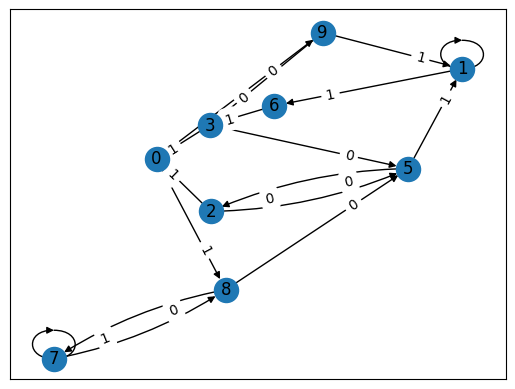

In [ ]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from typing import Tuple, List, Union
from numpy import linalg as LA

# Constants
NUM_STATES = 10
NUM_SYMBOLS = 2
ALPHA = 0.1

# Test the refactored code
H, matrices = create_random_epsilon_machine()
visualize_graph_with_selective_offset(H)


In [4]:
# Test the functions
NUM_STATES = 5
NUM_SYMBOLS = 2 # binary strings
ALPHA = 1.0


n_states = []
for repeats in range(1000):
    epsilon_machine_graph, epsilon_machine = create_random_epsilon_machine(NUM_STATES, NUM_SYMBOLS, ALPHA)
    n_states.append(epsilon_machine[0].shape[0])

In [21]:


epsilon_machine_graph, epsilon_machine = create_random_epsilon_machine(300, NUM_SYMBOLS, ALPHA)

# Test the refactored function with the epsilon machine
T = to_mixed_state_presentation(epsilon_machine=epsilon_machine, max_depth=7, threshold=1e-3)


In [24]:
emissions = generate_emissions(epsilon_machine, 100000)

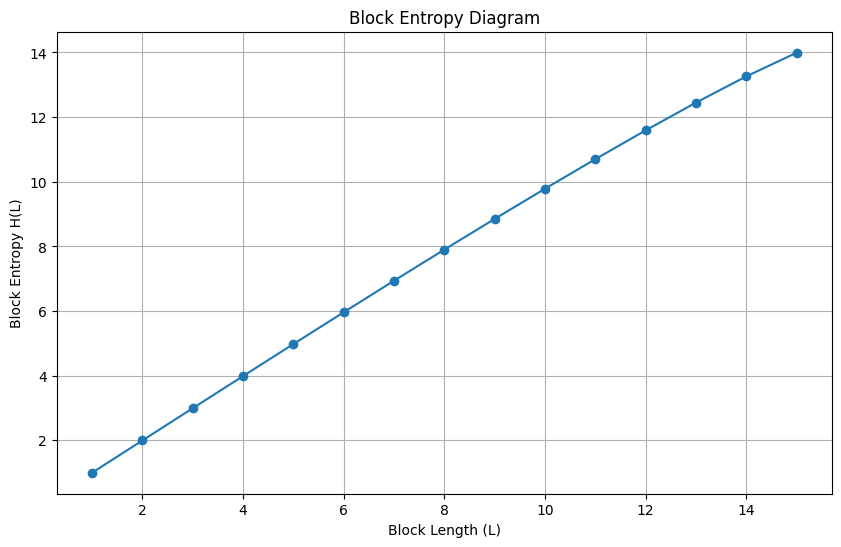

In [25]:
from collections import Counter
import matplotlib.pyplot as plt




# Generate the block entropy diagram for the generated sequence
plot_block_entropy_diagram(emissions, max_block_length=15)


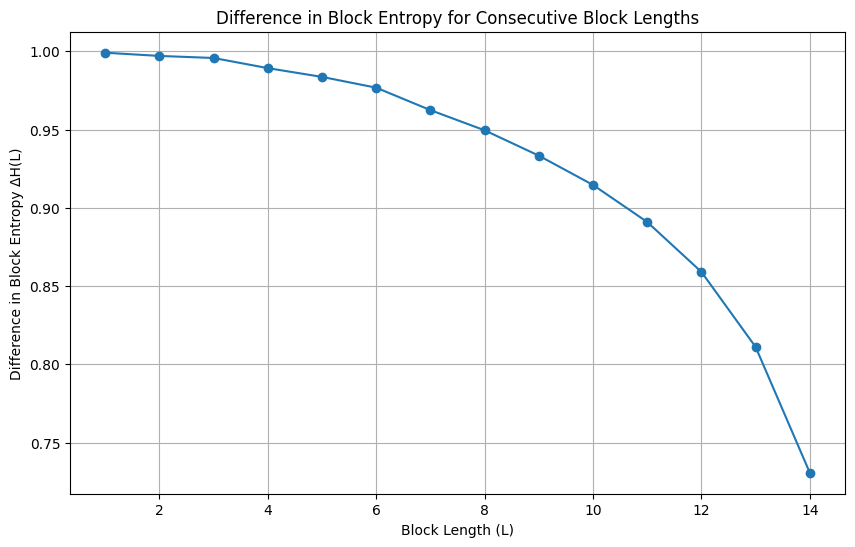

In [26]:
# Compute the differences of block entropy values
block_entropies = compute_block_entropy(emissions, max_block_length=15)
differences = np.diff(block_entropies)

# Plot the differences
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(differences) + 1), differences, marker='o', linestyle='-')
plt.xlabel('Block Length (L)')
plt.ylabel('Difference in Block Entropy ΔH(L)')
plt.title('Difference in Block Entropy for Consecutive Block Lengths')
plt.grid(True)
plt.show()


In [19]:
# import tqdm
from tqdm import tqdm

# Test the functions
NUM_STATES = 30
NUM_SYMBOLS = 2 # binary strings
ALPHA = 1.0

all_block_entropies = []
n_states = []
for repeats in tqdm(range(1000)):
    epsilon_machine_graph, epsilon_machine = create_random_epsilon_machine(NUM_STATES, NUM_SYMBOLS, ALPHA)
    emissions = generate_emissions(epsilon_machine, 10000)
    block_entropies = compute_block_entropy(emissions, max_block_length=15)
    all_block_entropies.append(block_entropies)

 48%|████▊     | 484/1000 [07:00<07:28,  1.15it/s]


KeyboardInterrupt: 

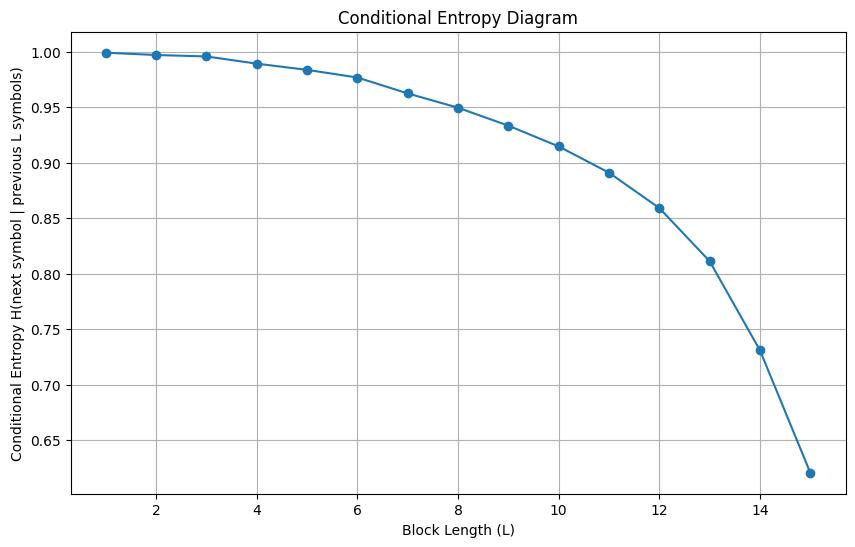

In [27]:




# Generate the conditional entropy diagram for the generated sequence
plot_conditional_entropy_diagram(emissions, max_block_length=15)


In [42]:
results = {}
for repeats in range(10):
    for i in tqdm([30, 300, 3000]):
        # if results[i] doesnt exist, then initialize it as []
        if i not in results:
            results[i] = []
        epsilon_machine = create_random_epsilon_machine(i, NUM_SYMBOLS, 1.0)[1]
        emissions = generate_emissions(epsilon_machine, 1000000)
        conditional_entropy = compute_empirical_conditional_entropy(emissions, 15)
        results[i].append(conditional_entropy)




100%|██████████| 3/3 [05:29<00:00, 109.82s/it]


(0.3, 0.7)

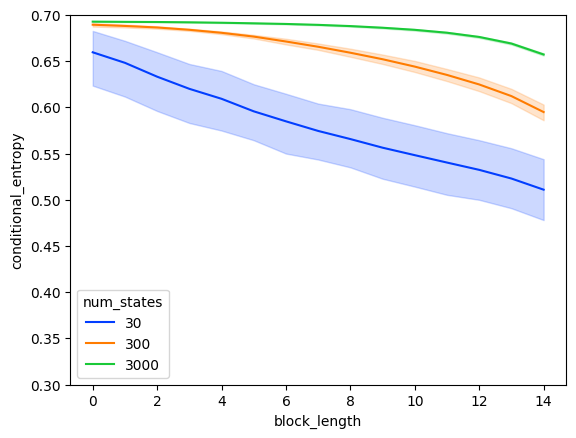

In [50]:
# use seaborn to plot results
import seaborn as sns
import pandas as pd

# create a list of lists
# i want to keep track of the number of states
# and the conditional entropy values
# and the repeat number
# and the block length which is just the index of the array

# create a list of lists
data = []
for num_states, conditional_entropy in results.items():
    for repeat_number, conditional_entropy_values in enumerate(conditional_entropy):
        for block_length, conditional_entropy_value in enumerate(conditional_entropy_values):
            data.append([num_states, repeat_number, block_length, conditional_entropy_value])

# create a dataframe from the list of lists
df = pd.DataFrame(data, columns=['num_states', 'repeat_number', 'block_length', 'conditional_entropy'])

# plot the results, with 90% confidence intervals
sns.lineplot(data=df, x='block_length', y='conditional_entropy', hue='num_states',
              errorbar =('ci', 90), legend='full', palette='bright')
plt.ylim([0.3, 0.7])

In [52]:


# Compute the minimum error for the epsilon machine
compute_minimum_error(epsilon_machine)


0.25722179587385385

In [55]:
import os
import pandas as pd

# Ensure the directory "data" exists
if not os.path.exists("data"):
    os.makedirs("data")


# Initialize results dictionary and DataFrame
results = {}
df = pd.DataFrame(columns=["Number of States", "Block Size", "Conditional Entropy", 
                           "Inverse Binary Entropy", "Minimum Error", "Filename"])

for repeats in range(10):
    for num_states in tqdm([30, 300, 3000]):
        epsilon_machine = create_random_epsilon_machine(num_states, NUM_SYMBOLS, 1.0)[1]
        emissions = generate_emissions(epsilon_machine, 1000000)
        conditional_entropies = compute_empirical_conditional_entropy(emissions, 15)
        
        # Save the epsilon machine to a file
        filename = save_epsilon_machine_to_file(epsilon_machine, num_states, repeats)
        
        # Update the DataFrame
        for block_size, cond_entropy in enumerate(conditional_entropies, 1):
            inverse_entropy = inverse_binary_entropy(cond_entropy)
            min_error = compute_minimum_error(epsilon_machine)
            df = df.append({
                "Number of States": num_states,
                "Block Size": block_size,
                "Conditional Entropy": cond_entropy,
                "Inverse Binary Entropy": inverse_entropy,
                "Minimum Error": min_error,
                "Filename": filename
            }, ignore_index=True)

df.head()  # Display the top rows of the DataFrame for a quick look


  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\adamimos\AppData\Local\Temp\ipykernel_50000\1685384543.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\adamimos\AppData\Local\Temp\ipykernel_50000\1685384543.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\adamimos\AppData\Local\Temp\ipykernel_50000\1685384543.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\adamimos\AppData\Local\Temp\ipykernel_50000\1685384543.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\adamimos\AppData\Local\Temp\ipykernel_50000\1685384543.py:32: 

,Number of States,Block Size,Conditional Entropy,Inverse Binary Entropy,Minimum Error,Filename
0,30,1,0.676574,0.409220,0.280081,data/epsilon_machine_30_0.npz
1,30,2,0.671859,0.397198,0.280081,data/epsilon_machine_30_0.npz
2,30,3,0.670440,0.393852,0.280081,data/epsilon_machine_30_0.npz
3,30,4,0.647971,0.350848,0.280081,data/epsilon_machine_30_0.npz
4,30,5,0.639758,0.338087,0.280081,data/epsilon_machine_30_0.npz


In [56]:
# add a column to the dataframe that is (inverse_binary_entropy - minimum_error)/minimum_error
df['error_ratio'] = (df['Inverse Binary Entropy'] - df['Minimum Error']) / df['Minimum Error']

<Axes: xlabel='Block Size', ylabel='error_ratio'>

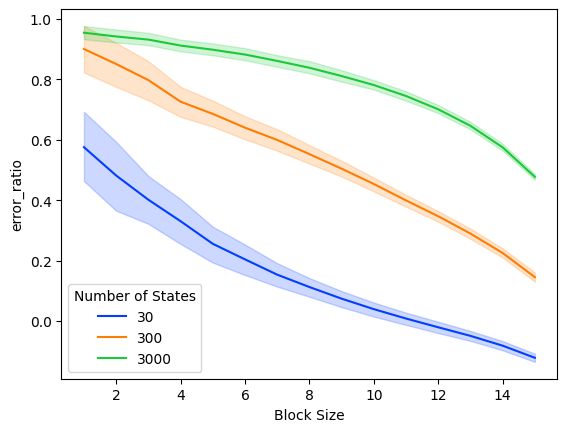

In [57]:
# make a plot of the error ratio vs the block size
sns.lineplot(data=df, x='Block Size', y='error_ratio', hue='Number of States',
                errorbar =('ci', 90), legend='full', palette='bright')

In [58]:
# save the df
df.to_csv('data/df.csv', index=False)